<a href="https://colab.research.google.com/github/Sirhabeeb1/python/blob/main/Augmentation_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Dense, Activation
from  tensorflow.keras.models import Sequential
import cv2
import os
import PIL
import tensorflow as tf

In [ ]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
dataset_dir= tf.keras.utils.get_file("flower_photo", origin= dataset_url,cache_dir=r"C:\Users\HP\Desktop",extract=True )

228813984/228813984 ━━━━━━━━━━━━━━━━━━━━ 11s 0us/step


In [ ]:
dataset_dir

'/tmp/.keras/datasets/flower_photo'

In [ ]:
from pathlib import Path
dataset_dir = Path('/tmp/.keras/datasets/flower_photos')
dataset_dir

PosixPath('/tmp/.keras/datasets/flower_photos')

In [ ]:
jpg_file = len(list(dataset_dir.glob("*/*.jpg")))
jpg_file

3670

In [ ]:
roses = list(dataset_dir.glob("roses/*.jpg"))[:5]
roses

[PosixPath('/tmp/.keras/datasets/flower_photos/roses/13279526615_a3b0059bec.jpg'),
 PosixPath('/tmp/.keras/datasets/flower_photos/roses/4609168052_3d4e1d3804_n.jpg'),
 PosixPath('/tmp/.keras/datasets/flower_photos/roses/8388497874_1fe750cc95_m.jpg'),
 PosixPath('/tmp/.keras/datasets/flower_photos/roses/512694812_48ba9c0b49_n.jpg'),
 PosixPath('/tmp/.keras/datasets/flower_photos/roses/6280787884_141cd7b382_n.jpg')]

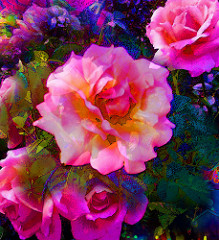

In [ ]:
from PIL import Image
Image.open(str(roses[2]))

In [ ]:
flowers_images_dict = {
    'roses': list(dataset_dir.glob('roses/*')),
    'daisy': list(dataset_dir.glob('daisy/*')),
    'dandelion': list(dataset_dir.glob('dandelion/*')),
    'sunflowers': list(dataset_dir.glob('sunflowers/*')),
    'tulips': list(dataset_dir.glob('tulips/*'))}

In [ ]:
flowers_labels_dict = {
    'roses': 0,
    'daisy': 1,
    'dandelion': 2,
    'sunflowers': 3,
    'tulips': 4,
}

In [ ]:
x = []
y = []

for flower_name, images in flowers_images_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img, (180,180))
        x.append(resized_img)
        y.append(flowers_labels_dict[flower_name])


In [ ]:
x = np.array(x)
y = np.array(y)

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0)

In [ ]:
x_train_scaled = x_train / 255
x_test_scaled = x_test / 255

In [ ]:
from tensorflow.keras import layers
num_classes = 5

model = Sequential([
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes, activation="softmax")
])

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.fit(x_train_scaled, y_train, epochs=15)

Epoch 1/15


/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/nn.py:635: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


86/86 ━━━━━━━━━━━━━━━━━━━━ 9s 20ms/step - accuracy: 0.3187 - loss: 1.6469
Epoch 2/15
86/86 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.5907 - loss: 1.0539
Epoch 3/15
86/86 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 0.6690 - loss: 0.8773
Epoch 4/15
86/86 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.7566 - loss: 0.6436
Epoch 5/15
86/86 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.8386 - loss: 0.4571
Epoch 6/15
86/86 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.9027 - loss: 0.2849
Epoch 7/15
86/86 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - accuracy: 0.9517 - loss: 0.1594
Epoch 8/15
86/86 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - accuracy: 0.9813 - loss: 0.0717
Epoch 9/15
86/86 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 0.9887 - loss: 0.0511
Epoch 10/15
86/86 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.9818 - loss: 0.0701
Epoch 11/15
86/86 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.9966 - loss: 0.0189
Epoch 12/15
86/86 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - accuracy: 0.9855 - l

In [ ]:
model.evaluate(x_test_scaled,y_test)

29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - accuracy: 0.6453 - loss: 2.3386


[2.2346079349517822, 0.6492374539375305]

my train accuracy is very high (99%) while the test accuracy is significantly low (64.53%) indicating overfitting. i will do data augmentation to minimize the overfitting

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.preprocessing import image_dataset_from_directory
img_height = 180
img_width = 180
data_augmentation = Sequential([
    layers.RandomFlip("horizontal", input_shape=(img_height,
                                                  img_width,
                                                  3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
  ]
)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


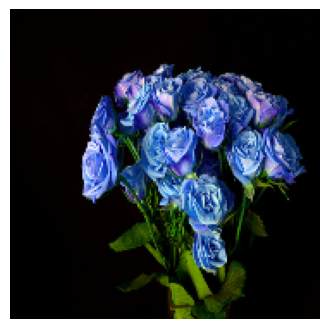

In [ ]:
fig = plt.figure(figsize=(4,5))
plt.axis("off")
plt.imshow(x[0])

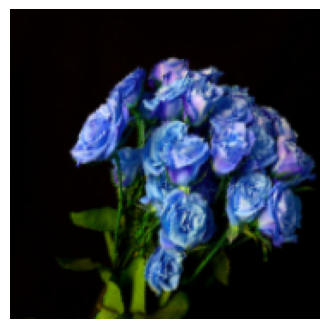

In [ ]:
fig = plt.figure(figsize=(4,5))
plt.axis("off")
plt.imshow(data_augmentation(x)[0].numpy().astype("uint8"))

In [ ]:
model = Sequential([
  data_augmentation,
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes, activation="softmax")
])

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.fit(x_train_scaled, y_train, epochs=30)

Epoch 1/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - accuracy: 0.3390 - loss: 1.5981
Epoch 2/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - accuracy: 0.5604 - loss: 1.1370
Epoch 3/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - accuracy: 0.6230 - loss: 0.9837
Epoch 4/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - accuracy: 0.6548 - loss: 0.8878
Epoch 5/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - accuracy: 0.6790 - loss: 0.8423
Epoch 6/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - accuracy: 0.6911 - loss: 0.7796
Epoch 7/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - accuracy: 0.7115 - loss: 0.7312
Epoch 8/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - accuracy: 0.7389 - loss: 0.6961
Epoch 9/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - accuracy: 0.7665 - loss: 0.6344
Epoch 10/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - accuracy: 0.7575 - loss: 0.6401
Epoch 11/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - accuracy: 0.7646 - loss: 0.6024
Epoch 12/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - accuracy:

In [ ]:
model.evaluate(x_test_scaled,y_test)

29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.7359 - loss: 0.9528


[0.9192356467247009, 0.7505446672439575]

Great improvement is notice in model evaluation of test dataset after Augumentation of the dataset